In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [3]:
train = pd.read_csv('/content/gdrive/My Drive/DACON2/train.csv')
train.head()

,ID,추석까지 남은 기간(주),쇼핑몰 구분,가격(원),프로모션 여부,도시 유형,지역 유형,쇼핑몰 유형,선물 유형,수요량
0,TRAIN_0000,1,쇼핑몰 15,212000,0,도시 6,지역 1,쇼핑몰 유형 2,명절혼합과일선물세트,28
1,TRAIN_0001,2,쇼핑몰 72,113000,0,도시 21,지역 1,쇼핑몰 유형 1,발효홍삼선물세트,27
2,TRAIN_0002,0,쇼핑몰 15,67000,0,도시 6,지역 1,쇼핑몰 유형 2,실속스팸선물세트,769
3,TRAIN_0003,1,쇼핑몰 13,206000,0,도시 12,지역 3,쇼핑몰 유형 1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,쇼핑몰 65,140000,0,도시 16,지역 2,쇼핑몰 유형 2,자연산새우선물세트,337


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5872 non-null   object
 1   추석까지 남은 기간(주)  5872 non-null   int64 
 2   쇼핑몰 구분         5872 non-null   object
 3   가격(원)          5872 non-null   int64 
 4   프로모션 여부        5872 non-null   int64 
 5   도시 유형          5872 non-null   object
 6   지역 유형          5872 non-null   object
 7   쇼핑몰 유형         5872 non-null   object
 8   선물 유형          5872 non-null   object
 9   수요량            5872 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 458.9+ KB


In [5]:
# 기술통계량을 확인하는 코드입니다.
train.describe()

,추석까지 남은 기간(주),가격(원),프로모션 여부,수요량
count,5872.000000,5872.000000,5872.000000,5872.000000
mean,0.983311,157896.287466,0.085320,264.313692
std,0.814237,75806.989671,0.279381,338.789214
min,0.000000,38000.000000,0.000000,13.000000
25%,0.000000,112000.000000,0.000000,54.000000
50%,1.000000,139000.000000,0.000000,136.000000
75%,2.000000,212000.000000,0.000000,350.000000
max,2.000000,340000.000000,1.000000,4455.000000


In [6]:
# 한글 처리
plt.rc('font', family='NanumBarunGothic')

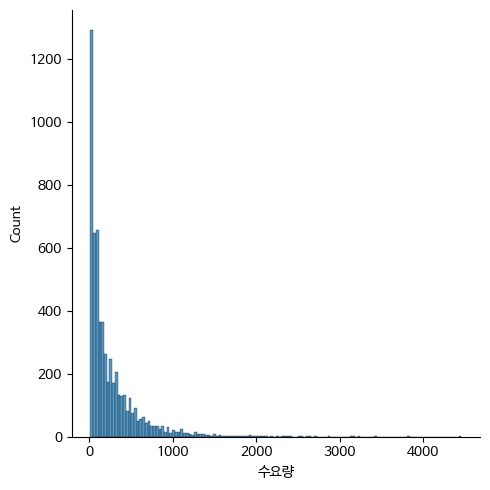

In [7]:
sns.displot(train['수요량'])
plt.show()

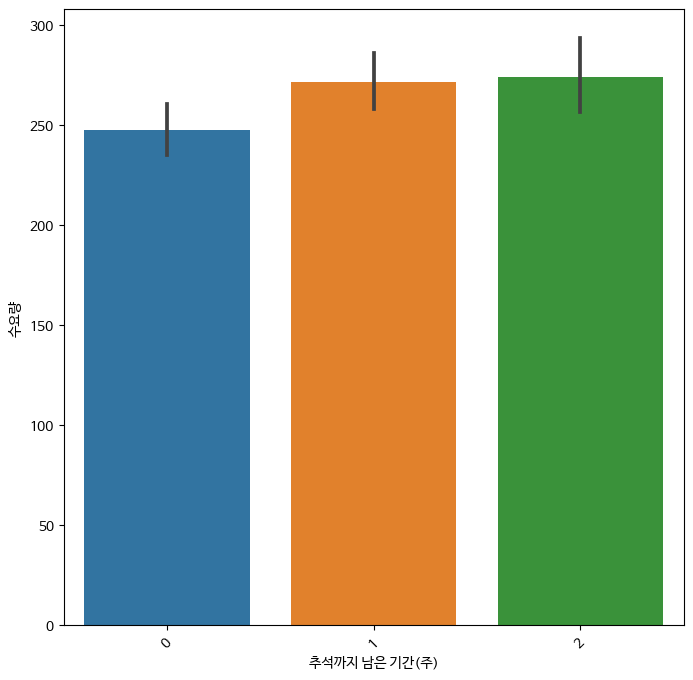

In [8]:
plt.figure(figsize = (8,8))
sns.barplot(x = train['추석까지 남은 기간(주)'], y = train['수요량'])
plt.xticks(rotation=45)
plt.show()

<Axes: >

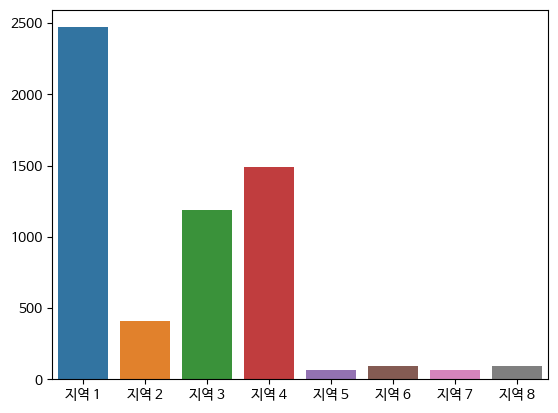

In [9]:
region_category = train['지역 유형'].value_counts().sort_index()
sns.barplot(x = region_category.index, y = region_category.values)

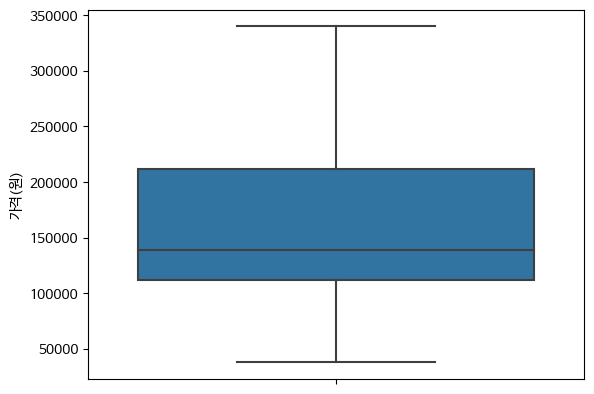

In [10]:
sns.boxplot(y = train['가격(원)'])
plt.show()

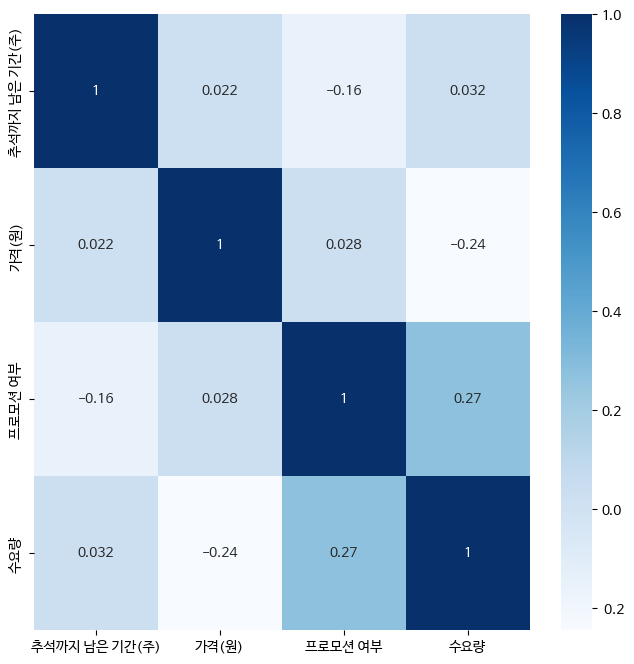

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()